In [1]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject, CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

In [2]:
using OrdinaryDiffEq, ParameterizedFunctions, LSODA, Sundials, DiffEqDevTools

reshape2d_4d (generic function with 1 method)

In [142]:
img = convert(Array{Float32,2}, load(datadir("temp5_100_100_gs.png")));
img = LaminartGPU.reshape2d_4d(img)
img = cu(img)

r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartGPU.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  Q_temp,
similar(arr1), #   P_temp
    );

prob = ODEProblem(f, u0, tspan, p);

# bm

In [132]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-12)

  7.921547 seconds (8.32 M allocations: 385.295 MiB, 1.04% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 103-element Array{Float32,1}:
   0.0
   1.0f-6
   8.413867f-6
   5.1425213f-5
   0.00024772706
   0.0009696785
   0.0035358486
   0.011013798
   0.02679477
   0.055688616
   0.11094137
   0.17637524
   0.27431515
   ⋮
  86.594025
  87.91702
  89.23996
  90.5631
  91.88639
  93.20973
  94.53324
  95.856606
  97.17993
  98.50325
  99.82682
 100.0
u: 103-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0

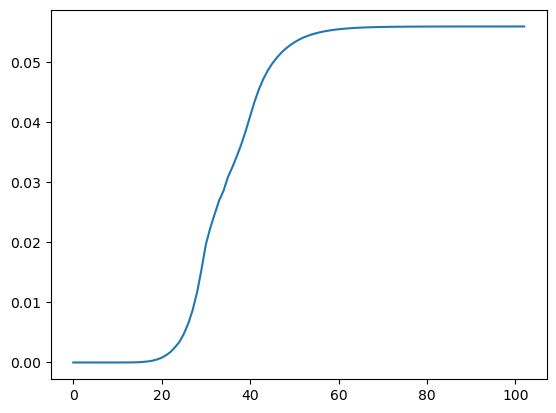

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5f759c2f10>

In [133]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [137]:
u0_ = sol[end];

In [138]:
prob = ODEProblem(f, u0_, tspan, p);

In [140]:
@time sol = solve(prob)

  2.181925 seconds (2.34 M allocations: 119.797 MiB)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 80-element Array{Float32,1}:
   0.0
   0.5917013
   1.8433466
   3.6955342
   5.8326693
   7.720086
   9.039394
  10.222854
  11.349757
  12.504499
  13.718983
  14.993238
  16.30224
   ⋮
  86.44686
  87.698975
  88.95112
  90.20328
  91.455444
  92.7076
  93.95975
  95.21188
  96.46401
  97.71615
  98.96829
 100.0
u: 80-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0

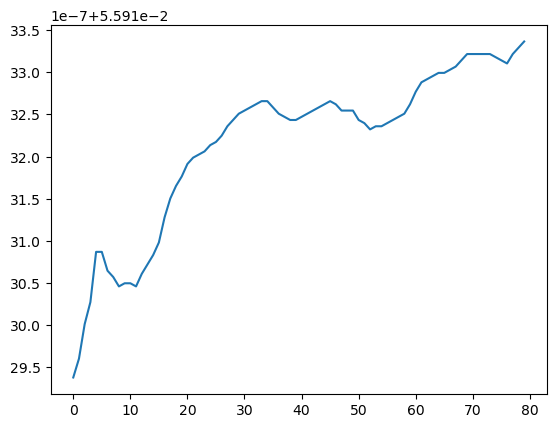

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5f73618bd0>

In [141]:

plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [7]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-1)

┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /mnt/storage_1/users/cullinanen/.julia/packages/DiffEqBase/ytJuW/src/integrator_interface.jl:349


  1.952444 seconds (2.62 M allocations: 129.131 MiB, 6.77% gc time)


retcode: Unstable
Interpolation: specialized 4th order "free" interpolation
t: 81-element Array{Float32,1}:
  0.0
  1.0f-6
  8.487408f-6
  6.338219f-5
  0.00040379813
  0.002229206
  0.010690104
  0.034533344
  0.07624388
  0.1869244
  0.32797977
  0.5521835
  0.8786926
  ⋮
 81.16353
 82.571175
 83.97864
 85.38578
 86.792244
 88.196815
 89.59344
 90.933846
 92.24622
 92.51354
 92.66755
 92.696045
u: 81-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 

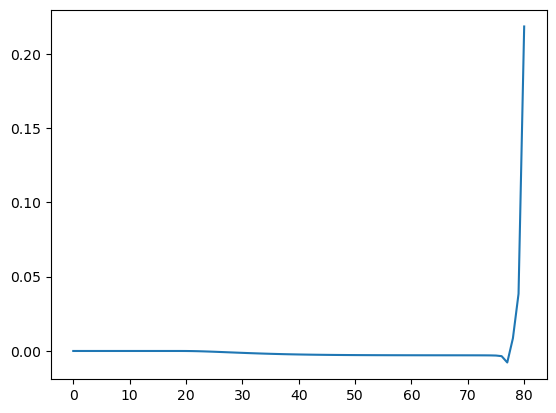

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb608c18990>

In [8]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [9]:
@time sol = solve(prob, alg=Tsit5(), abstol = 1e-12)

 14.188466 seconds (18.59 M allocations: 907.417 MiB, 3.78% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 444-element Array{Float32,1}:
   0.0
   1.0f-6
   3.661085f-6
   1.0921247f-5
   3.2022264f-5
   8.497354f-5
   0.00017433194
   0.00031193314
   0.00052139844
   0.0008219229
   0.0012426602
   0.0017927382
   0.0025866805
   ⋮
 486.28705
 487.5397
 488.79236
 490.045
 491.29767
 492.55032
 493.80298
 495.05563
 496.3083
 497.56094
 498.8136
 500.0
u: 444-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 

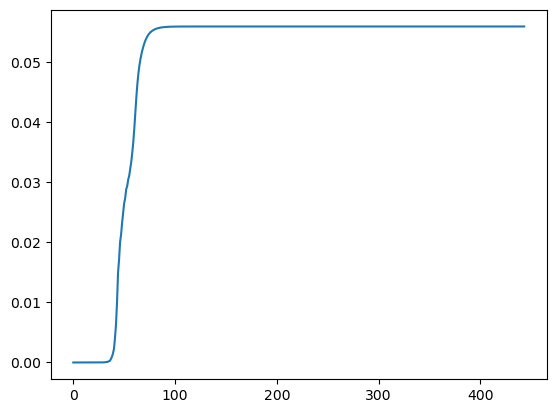

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb5d8066850>

In [10]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [11]:
@time sol = solve(prob, alg=Tsit5(), abstol = 1e-1)

InterruptException: InterruptException:

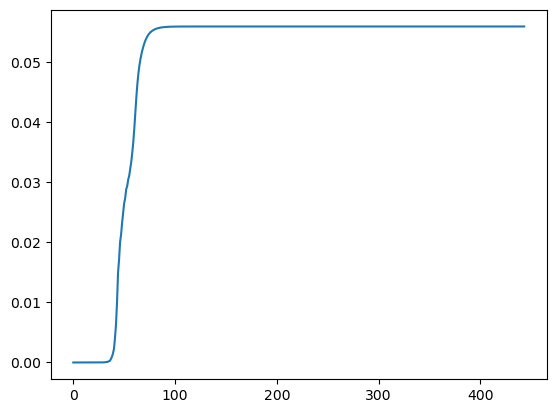

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb5b1699e10>

In [12]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [ ]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-12, abstol = 1e-1)

In [ ]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [15]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-12, abstol = 1e-12)

OutOfGPUMemoryError: Out of GPU memory trying to allocate 468.750 KiB
Effective GPU memory usage: 100.00% (11.172 GiB/11.172 GiB)
CUDA allocator usage: 11.017 GiB
BinnedPool usage: 11.017 GiB (11.017 GiB allocated, 0 bytes cached)


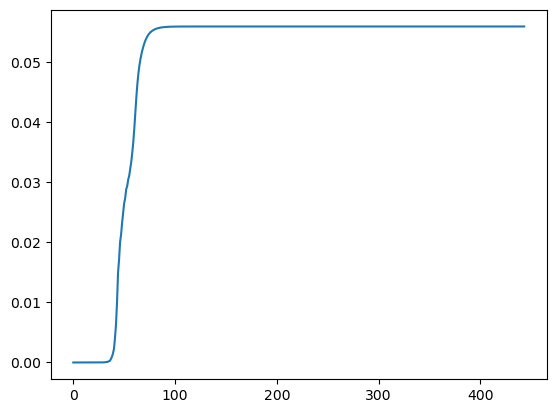

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb5b15e9a50>

In [16]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [5]:
@time sol = solve(prob, alg=Tsit5(), abstol = 1e-2)

104.038953 seconds (139.39 M allocations: 6.795 GiB, 3.61% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 502-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   0.000111
   0.001111
   0.011110999
   0.08615019
   0.43213502
   0.9974804
   1.6655333
   2.6926756
   3.9810994
   5.8719115
   ⋮
 489.77145
 490.77307
 491.7747
 492.7763
 493.77792
 494.77954
 495.78116
 496.78278
 497.7844
 498.786
 499.78763
 500.0
u: 502-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.

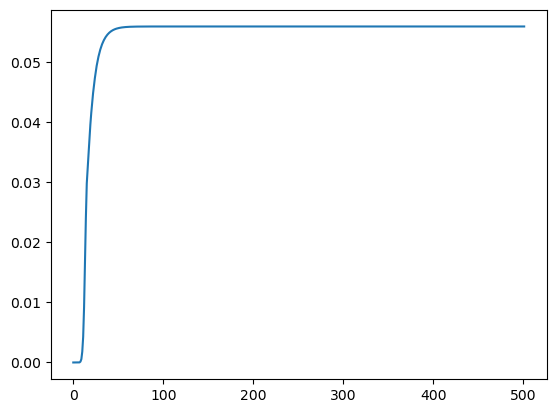

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/4W5rW/src/host/indexing.jl:43


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f41b347ca10>

In [6]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [7]:
@time sol = solve(prob, alg=Tsit5(),  abstol = 1e-4)

  8.922812 seconds (12.28 M allocations: 608.750 MiB, 4.85% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 403-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   0.000111
   0.0009743483
   0.0072889193
   0.03822235
   0.13367733
   0.3411232
   0.5988533
   0.98423004
   1.4547064
   2.0656223
   ⋮
 486.82855
 488.0887
 489.34888
 490.60904
 491.86917
 493.1293
 494.38943
 495.64957
 496.9097
 498.16986
 499.43002
 500.0
u: 403-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 

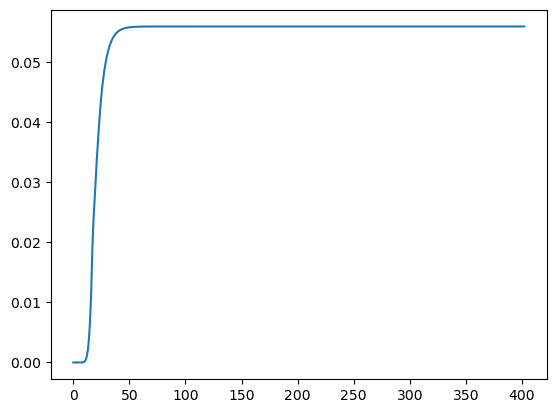

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f410cf34390>

In [8]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [11]:
@time sol = solve(prob, alg=Tsit5(),  abstol = 1e-5)

  9.144555 seconds (12.35 M allocations: 609.719 MiB, 5.70% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 402-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   9.432134f-5
   0.00060241466
   0.0032327166
   0.013323785
   0.04466847
   0.1188311
   0.23616767
   0.41348743
   0.63676524
   0.92250454
   ⋮
 486.37537
 487.65463
 488.9339
 490.21317
 491.49243
 492.7717
 494.05096
 495.33023
 496.6095
 497.88876
 499.16803
 500.0
u: 402-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 

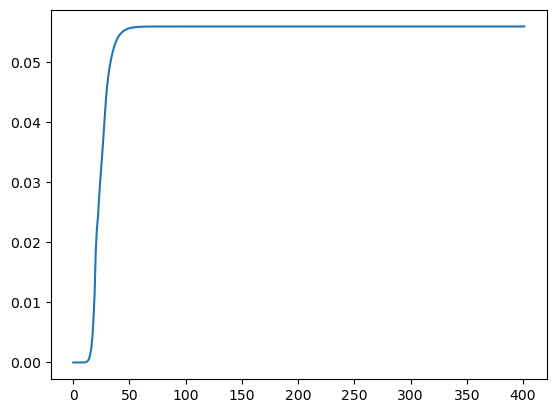

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff3eba3cad0>

In [12]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [13]:
out_a5 = Array(sol[:,:,7,1,end]);

In [14]:
out_a5_ =  Array(sol[:,:,:,1,end]);

In [5]:
@time sol = solve(prob, alg=Tsit5(),  abstol = 1e-6)

106.178628 seconds (136.92 M allocations: 6.671 GiB, 4.53% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 418-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154513
   0.004529668
   0.014951997
   0.04462811
   0.097211935
   0.16342771
   0.24633822
   0.41260046
   ⋮
 487.05807
 488.31024
 489.5624
 490.81458
 492.06674
 493.3189
 494.57108
 495.82324
 497.0754
 498.32758
 499.57974
 500.0
u: 418-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0

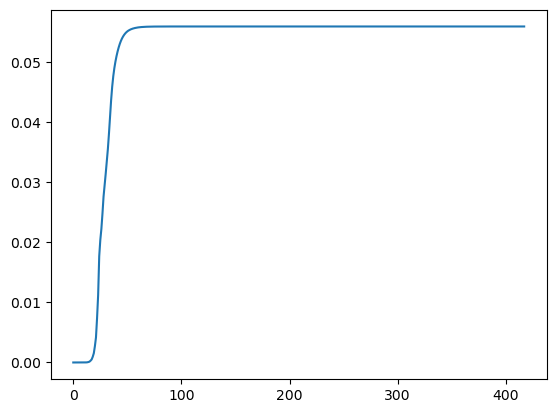

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/4W5rW/src/host/indexing.jl:43


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff4cf84ae90>

In [6]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [9]:
out_a6 = Array(sol[:,:,7,1,end]);

In [10]:
out_a6_ =  Array(sol[:,:,:,1,end]);

In [8]:
CUDA.memory_status()

Effective GPU memory usage: 16.47% (1.840 GiB/11.172 GiB)
CUDA allocator usage: 1.687 GiB
BinnedPool usage: 1.687 GiB (1.639 GiB allocated, 48.886 MiB cached)


In [17]:
@test out_a6 ≈ out_a5

Test Passed

In [19]:
@test out_a6_ ≈ out_a5_

Test Failed at In[19]:1
  Expression: out_a6_ ≈ out_a5_
   Evaluated: Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0] ≈ Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.

Test.FallbackTestSetException: There was an error during testing

In [20]:
out_a6_

100×100×12 Array{Float32,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.

In [21]:
@time sol = solve(prob)

 11.648792 seconds (14.10 M allocations: 701.911 MiB, 4.52% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 417-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154511
   0.004530169
   0.01524444
   0.045014914
   0.09819057
   0.1656858
   0.25060657
   0.4052239
   ⋮
 486.78772
 488.0399
 489.29205
 490.54422
 491.7964
 493.04855
 494.30072
 495.5529
 496.80505
 498.05722
 499.3094
 500.0
u: 417-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0

In [11]:
@time sol = solve(prob, alg=Tsit5(),  abstol = 1e-5)

  9.144555 seconds (12.35 M allocations: 609.719 MiB, 5.70% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 402-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   9.432134f-5
   0.00060241466
   0.0032327166
   0.013323785
   0.04466847
   0.1188311
   0.23616767
   0.41348743
   0.63676524
   0.92250454
   ⋮
 486.37537
 487.65463
 488.9339
 490.21317
 491.49243
 492.7717
 494.05096
 495.33023
 496.6095
 497.88876
 499.16803
 500.0
u: 402-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 

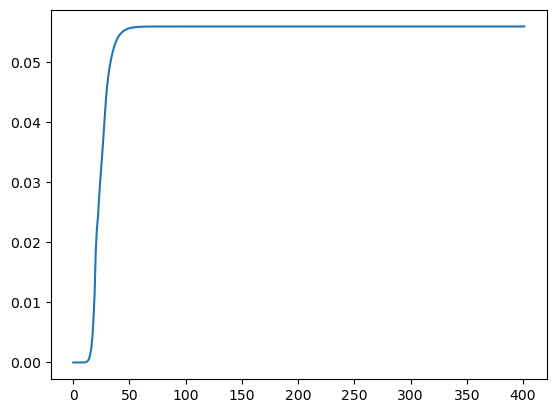

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff3eba3cad0>

In [12]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [13]:
out_a5 = Array(sol[:,:,7,1,end]);

In [14]:
out_a5_ =  Array(sol[:,:,:,1,end]);

In [27]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-8, abstol = 1e-5)

 10.292943 seconds (11.86 M allocations: 591.989 MiB, 3.60% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 394-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   9.4312854f-5
   0.00056582293
   0.0031113862
   0.012553915
   0.039637692
   0.10317114
   0.21312857
   0.367529
   0.55564207
   0.78043497
   ⋮
 486.36517
 487.6929
 489.0206
 490.34833
 491.67606
 493.00378
 494.33148
 495.65918
 496.98688
 498.31458
 499.6423
 500.0
u: 394-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;

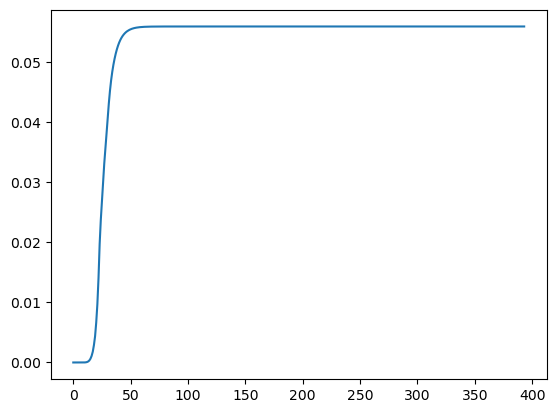

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff3c94f0250>

In [28]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [29]:
out_r5a8 = Array(sol[:,:,7,1,end]);

In [30]:
out_r5a8_ =  Array(sol[:,:,:,1,end]);

In [31]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-4, abstol = 1e-5)

 10.576725 seconds (11.81 M allocations: 589.061 MiB, 2.93% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 391-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   9.431371f-5
   0.0005658742
   0.002990664
   0.011307002
   0.037336323
   0.099874064
   0.20246169
   0.3626361
   0.5495514
   0.78389704
   ⋮
 485.54736
 486.87848
 488.2096
 489.5407
 490.8718
 492.20288
 493.53397
 494.86508
 496.1962
 497.5273
 498.85843
 500.0
u: 391-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ;

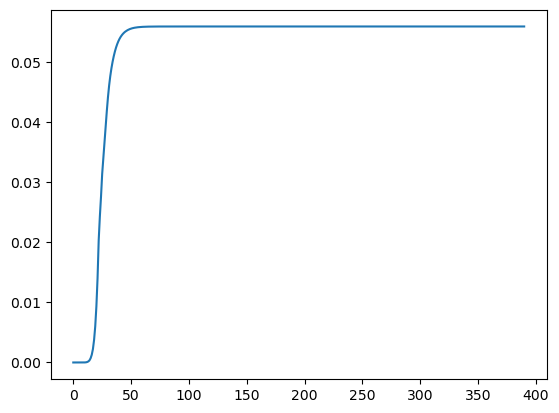

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff3c7fb62d0>

In [35]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [36]:
out_r4a5 = Array(sol[:,:,7,1,end]);

In [37]:
out_r4a5_ =  Array(sol[:,:,:,1,end]);

In [5]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-3, abstol = 1e-5)

104.649449 seconds (136.39 M allocations: 6.647 GiB, 4.00% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 402-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   9.432134f-5
   0.00060241466
   0.0032327166
   0.013323785
   0.04466847
   0.1188311
   0.23616767
   0.41348743
   0.63676524
   0.92250454
   ⋮
 486.38333
 487.6626
 488.94186
 490.22113
 491.5004
 492.77966
 494.05893
 495.3382
 496.61746
 497.89673
 499.176
 500.0
u: 402-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … 

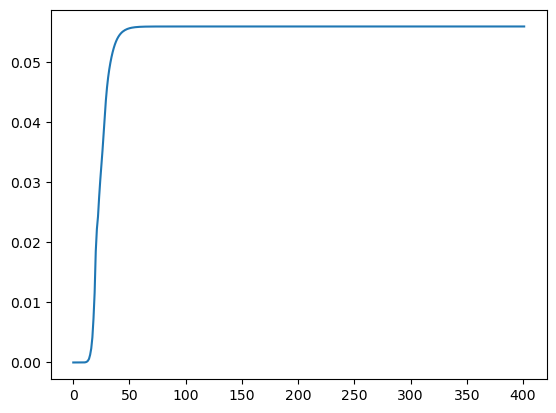

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/4W5rW/src/host/indexing.jl:43


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f604f95d710>

In [6]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [9]:
out_r3a5 = Array(sol[:,:,7,1,end]);
out_r3a5_ =  Array(sol[:,:,:,1,end]);

In [10]:
@time sol = solve(prob, alg=Tsit5(), reltol = 1e-2, abstol = 1e-5)

  9.446099 seconds (12.48 M allocations: 617.038 MiB, 4.13% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 409-element Array{Float32,1}:
   0.0
   1.0f-6
   1.1f-5
   9.4397226f-5
   0.00059727917
   0.0029267985
   0.012341363
   0.050698318
   0.13967624
   0.27912036
   0.4599198
   0.74846387
   1.014767
   ⋮
 486.47995
 487.72797
 488.97598
 490.22403
 491.47208
 492.72012
 493.96814
 495.21616
 496.4642
 497.71225
 498.9603
 500.0
u: 409-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;

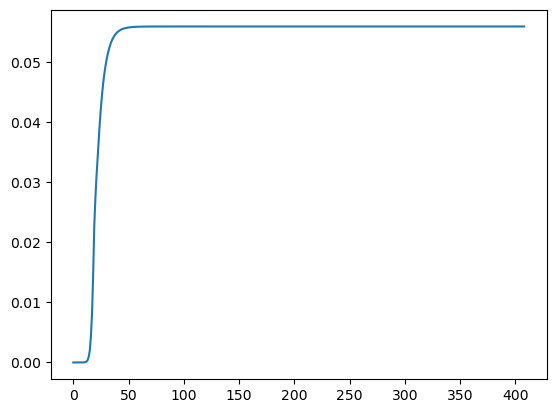

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5f9d31a990>

In [11]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [12]:
out_r2a5 = Array(sol[:,:,7,1,end]);
out_r2a5_ =  Array(sol[:,:,:,1,end]);

In [14]:
u0_ = similar(u0)
arr1_v = @view u0_[:, :, 1:p.K,:]
arr2_v = @view u0_[:, :, 1:1,:];

In [41]:
f = LaminartGPU.LamFunction_all_struct_reuse_1(
similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
arr1_v, #y::T
arr1_v, #z::T
arr2_v, #v_p::T
arr2_v, #v_m::T
arr1_v, #dx::T
arr1_v, #dy::T
arr1_v, #dm::T
arr1_v, #dz::T
arr1_v, #ds::T
arr2_v, #dv_p::T
arr2_v, #dv_m::T
	
similar(arr2), #tmp_a::T
similar(arr2), #tmp_b::T
	
similar(arr1), #tmp_A::T
similar(arr1), #tmp_B::T
similar(arr1), #tmp_C::T
    );

prob = ODEProblem(f, u0, tspan, p);

In [42]:
@time sol = solve(prob)

  8.052799 seconds (9.72 M allocations: 482.182 MiB, 2.44% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 320-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154516
   0.004527147
   0.016062036
   0.04921153
   0.14425065
   0.35134614
   0.6384717
   1.0131366
   ⋮
 482.35504
 483.98837
 485.6217
 487.25504
 488.88837
 490.5217
 492.15503
 493.78836
 495.4217
 497.05502
 498.68835
 500.0
u: 320-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 

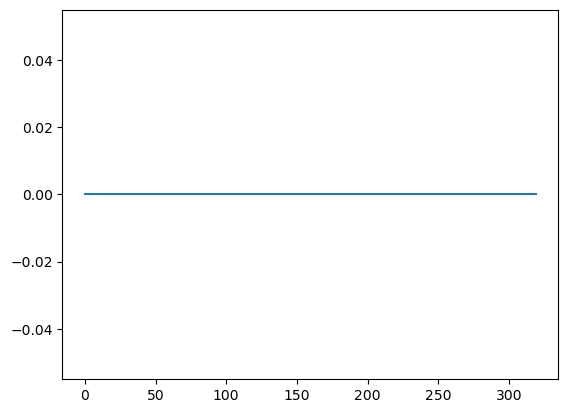

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5f7690cb50>

In [43]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

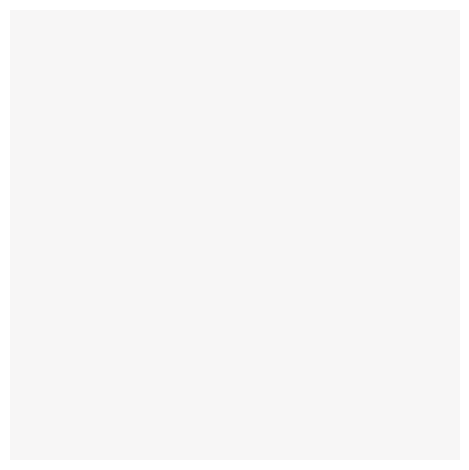

In [44]:
Utils.plot_rb(sol[:,:,7,1,end])

In [21]:
out_st = Array(sol[:,:,:,:,end]);

In [23]:
@time sol = solve(prob)

 10.491833 seconds (13.40 M allocations: 669.029 MiB, 3.62% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 417-element Array{Float32,1}:
   0.0
   1.0f-6
   8.414628f-6
   5.1463838f-5
   0.0002625384
   0.0011154511
   0.004530169
   0.01524444
   0.045014914
   0.09819057
   0.1656858
   0.25060657
   0.4052239
   ⋮
 486.78772
 488.0399
 489.29205
 490.54422
 491.7964
 493.04855
 494.30072
 495.5529
 496.80505
 498.05722
 499.3094
 500.0
u: 417-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0

In [25]:
out_org = Array(sol[:,:,:,:,end]);

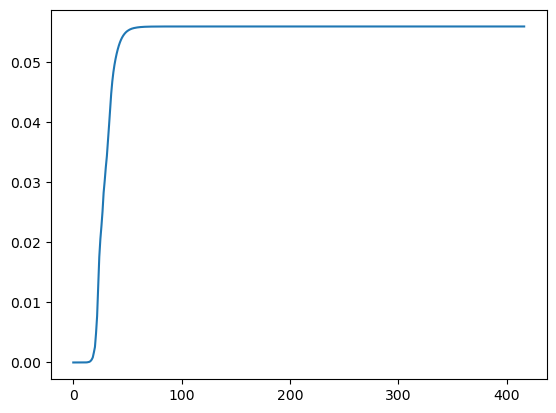

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5f77989d90>

In [38]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

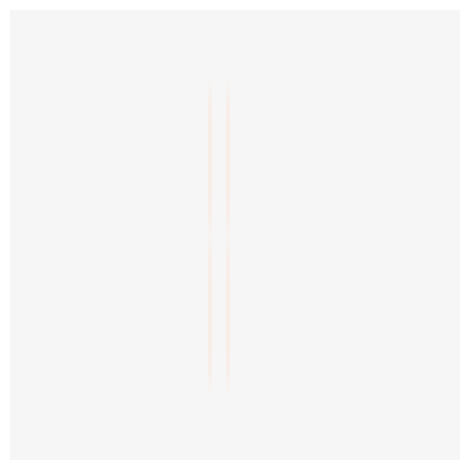

In [40]:
Utils.plot_rb(sol[:,:,7,1,end])

In [26]:
@test out_org ≈ out_st

Test Failed at In[26]:1
  Expression: out_org ≈ out_st
   Evaluated: Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0] ≈ Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0

Test.FallbackTestSetException: There was an error during testing

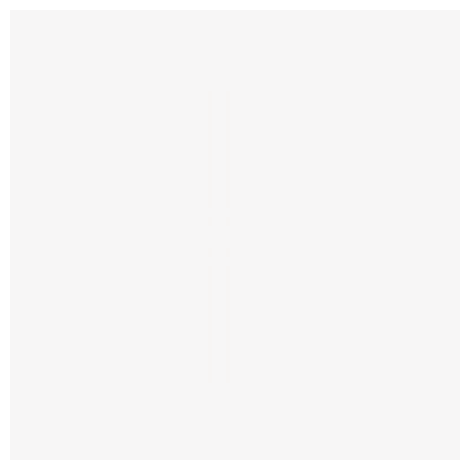

In [37]:
Utils.plot_rb(sol[:,:,1,1,end])

In [30]:
out_st

100×100×12×1 Array{Float32,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.

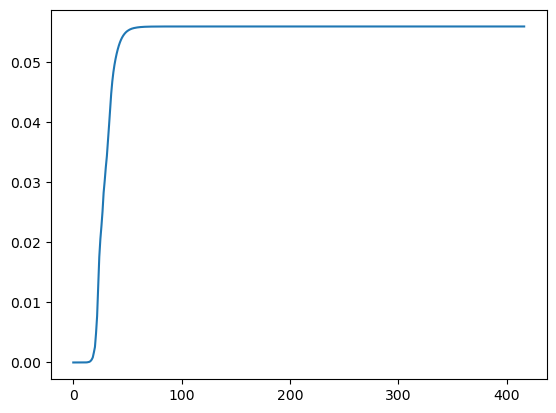

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5f77989d90>

In [38]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

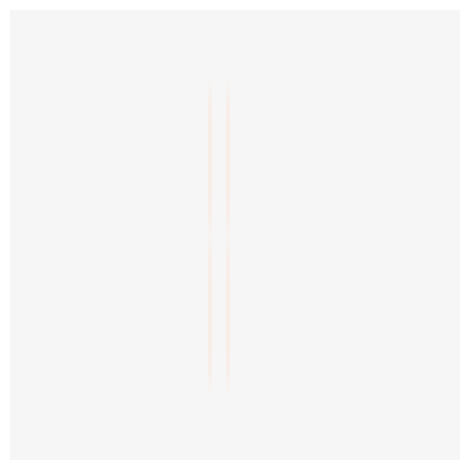

In [40]:
Utils.plot_rb(sol[:,:,7,1,end])

In [120]:
f(u0_, u0, p, 0.0f0)
@time f(u0_, u0, p, 0.0f0)

  0.000956 seconds (1.17 k allocations: 53.203 KiB)


In [128]:
f(u0_, u0, p, 0.0f0)
@time f(u0_, u0, p, 0.0f0)

  0.000829 seconds (1.17 k allocations: 53.203 KiB)


In [129]:
size(p.k_C_d)[2]>>1

2

In [130]:
f(u0_, u0, p, 0.0f0)
@time f(u0_, u0, p, 0.0f0)

  0.003497 seconds (4.62 k allocations: 240.656 KiB)
